In [1]:
%matplotlib inline

Show layers of the ImageContainer
=================================

This example shows how to use {func}`squidpy.im.ImageContainer.show`.

This function is useful to visualize statically different layers of the
`squidpy.im.ImageContainer` class.

:::{seealso}
-   See {doc}`compute_crops` and
    {doc}`compute_smooth` for additional
    examples on methods of the {class}`squidpy.im.ImageContainer`.

:::


In [3]:
import squidpy as sq

Load the Mibitof dataset.


In [4]:
adata = sq.datasets.mibitof()

We can briefly visualize the data to understand the type of images we
have.


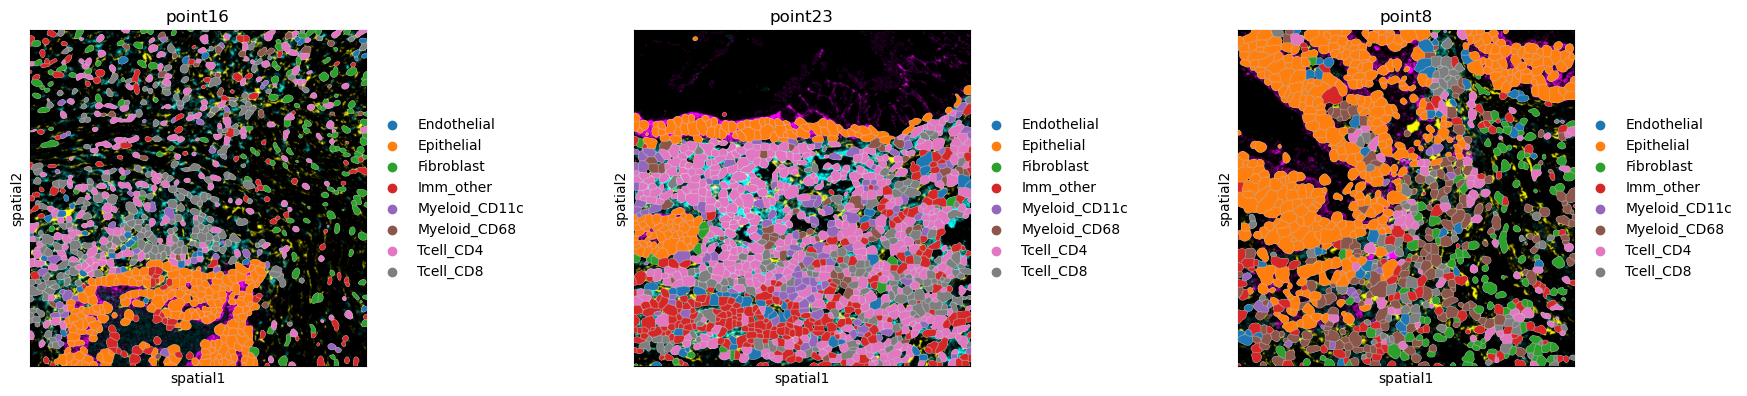

In [5]:
sq.pl.spatial_segment(
    adata,
    library_id=["point16", "point23", "point8"],
    seg_cell_id="cell_id",
    color="Cluster",
    library_key="library_id",
    title=["point16", "point23", "point8"],
)

We have three different tissue samples. We also have segmentation masks
for each tissue sample. Let\'s extract the image from the
`anndata.AnnData` object and create a `squidpy.im.ImageContainer`
object.


In [6]:
imgs = []
for library_id in adata.uns["spatial"].keys():
    img = sq.im.ImageContainer(
        adata.uns["spatial"][library_id]["images"]["hires"], library_id=library_id
    )
    img.add_img(
        adata.uns["spatial"][library_id]["images"]["segmentation"],
        library_id=library_id,
        layer="segmentation",
    )
    img["segmentation"].attrs["segmentation"] = True
    imgs.append(img)
img = sq.im.ImageContainer.concat(imgs)

We can visualize each image of the object with
{func}`squidpy.im.ImageContainer.show`.


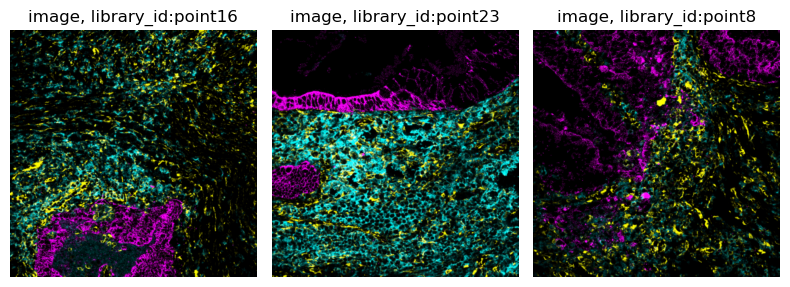

In [7]:
img.show("image")

{func}`squidpy.im.ImageContainer.show` also allows to overlay the results of
segmentation.


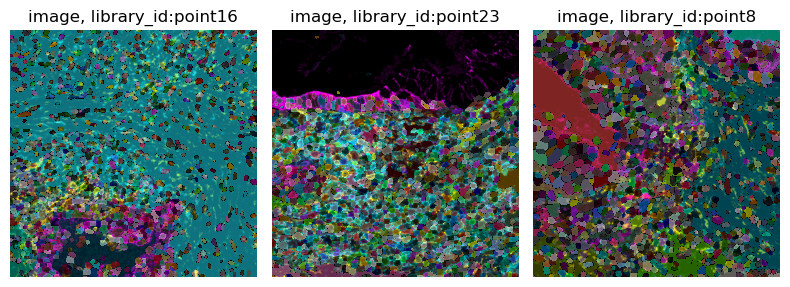

In [8]:
img.show("image", segmentation_layer="segmentation", segmentation_alpha=0.5)